In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)

In [211]:
## Players features dataset
features_df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')

drafted_df = pd.read_excel('data/DraftedPlayers2009-2021.xlsx')
drafted_df.columns = ['player_name','team','affiliation','year','round','round_1_pick','overall_pick']
drafted_df = drafted_df.drop(0, axis=0)

/var/folders/8r/k5yvmgxd5674477xypwpv4lw0000gn/T/ipykernel_33389/2767881670.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')


In [212]:
df = pd.merge(features_df, drafted_df, on=['player_name','year'], how='left')
df['round'] = np.where(df['pick'].isnull()==False, df['round'], 0)
df['round_1_pick'] = np.where(df['pick'].isnull()==False, df['round_1_pick'], 0)
df['overall_pick'] = np.where(df['pick'].isnull()==False, df['overall_pick'], 0)

In [213]:
df = df.drop(['team_y', 'affiliation', 'round', 'overall_pick', 'pick'], axis=1)

In [214]:
df = df.rename(columns={'round_1_pick': 'first_round_drafted'})
df['first_round_drafted'] = ((df['first_round_drafted'] > 0) & (df['first_round_drafted'] <= 30)).astype(int)
df = df.rename(columns={'team_x': 'team'})
df.head()

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65,first_round_drafted
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000,0


In [215]:
df = df.rename(columns = {'Unnamed: 64' : 'role'})
df = df.drop('Unnamed: 65', axis=1)

<AxesSubplot:>

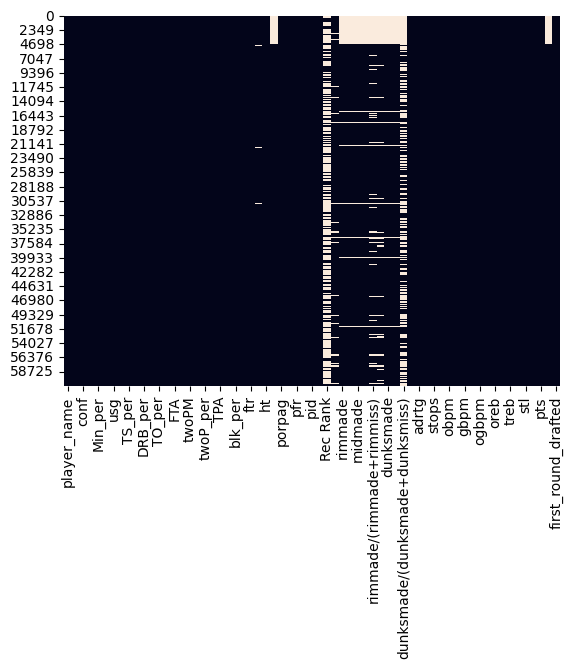

In [216]:
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

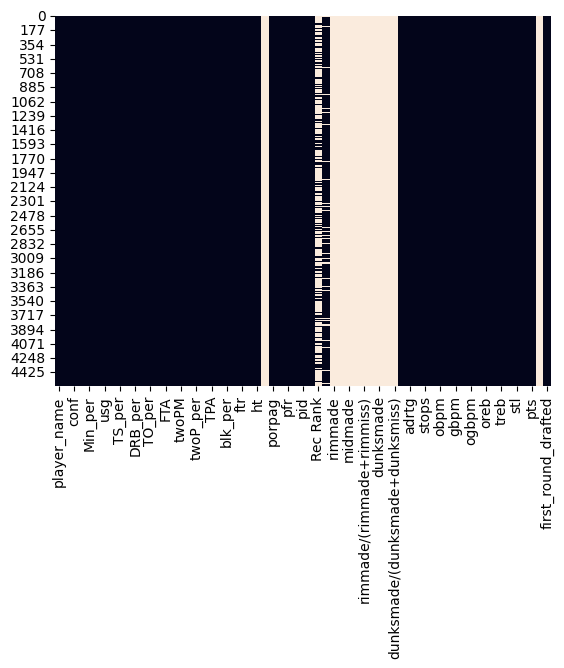

In [217]:
df_2009 = df[df.year == 2009]
sns.heatmap(df_2009.isnull(), cbar=False)

<AxesSubplot:>

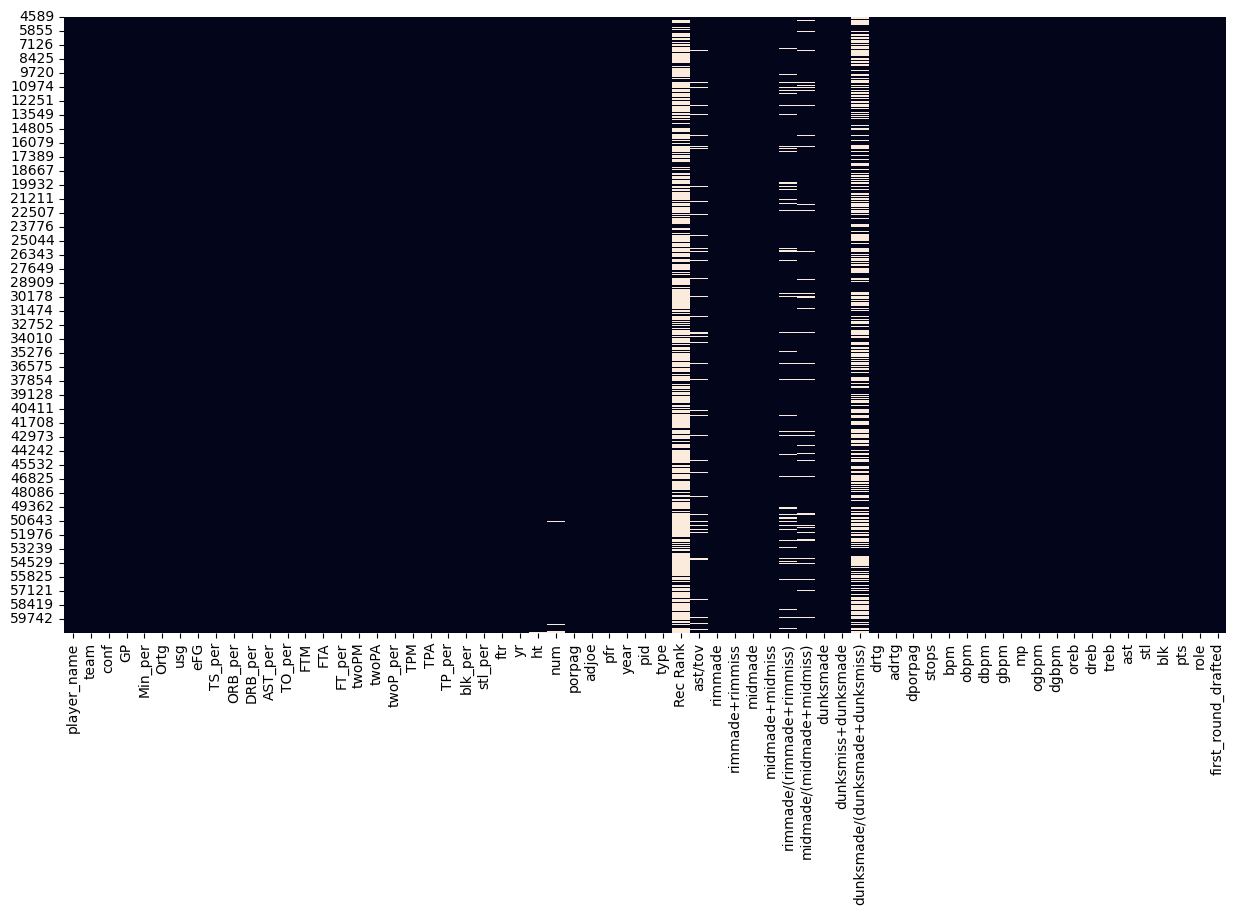

In [218]:
df = df[df.year != 2009]
df = df.dropna(thresh=len(df.columns) - 9)
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False)

In [219]:
df = df.drop(["Rec Rank", "dunksmade/(dunksmade+dunksmiss)"], axis=1)

In [220]:
df.columns[df.isnull().any()].tolist()

['yr',
 'ht',
 'num',
 'ast/tov',
 'rimmade',
 'rimmade+rimmiss',
 'midmade',
 'midmade+midmiss',
 'rimmade/(rimmade+rimmiss)',
 'midmade/(midmade+midmiss)',
 'dunksmade',
 'dunksmiss+dunksmade',
 'role']

In [221]:
df.yr.value_counts()

yr
Jr      14687
Fr      14299
So      12966
Sr      12621
57.1        1
0           1
42.9        1
Name: count, dtype: int64

In [222]:
df = df[df['yr'].isin(["Fr", "So", "Jr", "Sr"])]
df['yr'] = df['yr'].map({"Fr": 1, "So": 2, "Jr": 3, "Sr": 4})

In [223]:
df.ht.value_counts()

ht
7-Jun     5544
8-Jun     5399
5-Jun     5291
4-Jun     5280
6-Jun     5080
3-Jun     5023
2-Jun     4510
9-Jun     3985
1-Jun     3355
Jun-00    2823
10-Jun    2517
11-May    1390
10-May    1242
11-Jun    1127
Jul-00     671
9-May      546
8-May      216
1-Jul      205
7-May       88
2-Jul       85
3-Jul       39
6-May       36
-           27
Apr-00      16
4-Jul       12
6-Jul        7
5-May        6
2-May        4
4-May        4
5-Jul        3
0            1
1-May        1
3-May        1
5-Apr        1
Name: count, dtype: int64

In [224]:
def split_letters_numbers(s):
    letters = ''.join(re.findall("[a-zA-Z]+", s))
    numbers = ''.join(re.findall("[0-9]+", s))
    return letters, numbers

df['ht'] = df['ht'].fillna(method='ffill')

df[['ht_month', 'ht_day']] = df['ht'].astype(str).apply(lambda x: pd.Series(split_letters_numbers(x)))

In [225]:
df.num.value_counts()

num
1.0      2597
5.0      2466
3.0      2432
2.0      2411
0.0      2215
         ... 
99.0        2
99          1
4A          1
31/24       1
26.0        1
Name: count, Length: 77, dtype: int64

In [226]:
def get_number(s):
    return re.findall(r'[A-Za-z]+|\d+', s)[0]

df['num'] = df['num'].astype(str).apply(lambda x: pd.Series(get_number(x)))

In [227]:
df['num'] = pd.to_numeric(df['num'], errors='coerce')

In [228]:
df = df.dropna(subset=['num'])

In [229]:
df['role'].value_counts()

role
Wing G        12354
PF/C           8945
Combo G        8902
C              7887
Scoring PG     5784
Wing F         4905
Stretch 4      3181
Pure PG        2485
Name: count, dtype: int64

In [230]:
df.role.isnull().sum()

5

In [231]:
df = df.dropna(subset=['role'])

In [232]:
df = df.fillna(0)

<AxesSubplot:>

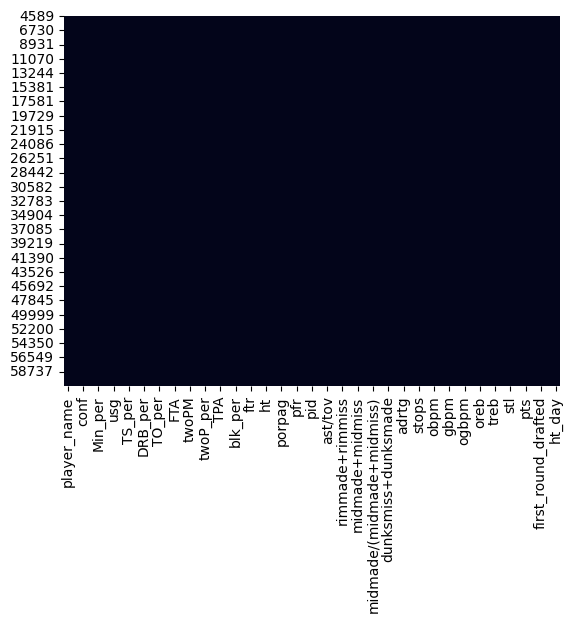

In [233]:
sns.heatmap(df.isnull(), cbar=False)

In [234]:
df.isnull().sum().sum()

0

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54443 entries, 4589 to 61057
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_name                54443 non-null  object 
 1   team                       54443 non-null  object 
 2   conf                       54443 non-null  object 
 3   GP                         54443 non-null  int64  
 4   Min_per                    54443 non-null  float64
 5   Ortg                       54443 non-null  float64
 6   usg                        54443 non-null  float64
 7   eFG                        54443 non-null  float64
 8   TS_per                     54443 non-null  float64
 9   ORB_per                    54443 non-null  float64
 10  DRB_per                    54443 non-null  float64
 11  AST_per                    54443 non-null  float64
 12  TO_per                     54443 non-null  float64
 13  FTM                        54443 non-null  int64

In [236]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [237]:
len(df.columns) == len(numerical_cols) + len(object_cols)

True

In [238]:
object_cols

['player_name', 'team', 'conf', 'ht', 'type', 'role', 'ht_month', 'ht_day']

In [239]:
#maybe frequency encoding for team?
#df = df.drop(['player_name', 'team', 'conf', 'ht', 'type'], axis=1)
df = df.drop(['player_name', 'conf', 'ht', 'type'], axis=1)

In [240]:
#frequency encoding + onehot for most popular wont work since too many duplicates, one hot directly, but creates a lot of new columns
from collections import Counter
frequency = Counter(df['team'].value_counts().tolist())
elements_more_than_once = [number for number, count in frequency.items() if count > 1]

same_vc = []

team_value_counts = df['team'].value_counts().to_dict()
teams = df.team.unique().tolist()
values_set = set(team_value_counts.values())
 
for team in teams:
    if team_value_counts[team] in elements_more_than_once:
        same_vc.append(team)

len(same_vc)

336

In [241]:
df.ht_month.unique().tolist()

['Jun', 'May', 'Jul', 'Apr', '']

In [242]:
df = df[df['ht_month'] != ""]

In [243]:
df.ht_day.unique().tolist()

['3', '2', '5', '4', '11', '7', '6', '10', '8', '9', '00', '1']

In [244]:
one_hot_cols = ['role', 'ht_month', 'ht_day', 'team']

In [245]:
for col in numerical_cols:
    num_unique = df[col].nunique()
    if num_unique <= 25:
        print(f"{col}: {num_unique}")

yr: 4
year: 12
first_round_drafted: 2


In [246]:
df.yr.value_counts()
#leave like this since ordinal structure

yr
3    14649
1    14231
2    12939
4    12598
Name: count, dtype: int64

In [247]:
df.year.value_counts()

year
2021    4636
2017    4606
2016    4580
2020    4574
2019    4570
2018    4563
2015    4559
2014    4528
2010    4512
2013    4433
2011    4429
2012    4427
Name: count, dtype: int64

In [248]:
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [249]:
bol_cols = df.select_dtypes(include=['bool']).columns.tolist()

In [250]:
df[bol_cols] = df[bol_cols].apply(lambda x: x.astype(int))

In [251]:
df = df.reset_index(drop=True)
df.shape

(54417, 439)

In [252]:
year_cols = [col for col in df.columns if col.startswith('year_')]

In [253]:
df_2021 = df[df['year']==2021]
df_2021 = df_2021.drop('year', axis=1)

#find a way to keep this data?
df = df[df['year']!=2021]
df = df.drop('year', axis=1)

In [254]:
print(df_2021.shape)
print(df.shape)

(4636, 438)
(49781, 438)


In [255]:
df.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,num,porpag,adjoe,pfr,pid,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,first_round_drafted,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G,ht_month_Jul,ht_month_Jun,ht_month_May,ht_day_1,ht_day_10,ht_day_11,ht_day_2,ht_day_3,ht_day_4,ht_day_5,ht_day_6,ht_day_7,ht_day_8,ht_day_9,team_Air Force,team_Akron,team_Alabama,team_Alabama A&M,team_Alabama St.,team_Albany,team_Alcorn St.,team_American,team_Appalachian St.,team_Arizona,team_Arizona St.,team_Arkansas,team_Arkansas Little Rock,team_Arkansas Pine Bluff,team_Arkansas St.,team_Army,team_Auburn,team_Austin Peay,team_BYU,team_Ball St.,team_Baylor,team_Bellarmine,team_Belmont,team_Bethune Cookman,team_Binghamton,team_Boise St.,team_Boston College,team_Boston University,team_Bowling Green,team_Bradley,team_Brown,team_Bryant,team_Bucknell,team_Buffalo,team_Butler,team_Cal Baptist,team_Cal Poly,team_Cal St. Bakersfield,team_Cal St. Fullerton,team_Cal St. Northridge,team_California,team_Campbell,team_Canisius,team_Centenary,team_Central Arkansas,team_Central Connecticut,team_Central Michigan,team_Charleston Southern,team_Charlotte,team_Chattanooga,team_Chicago St.,team_Cincinnati,team_Clemson,team_Cleveland St.,team_Coastal Carolina,team_Colgate,team_College of Charleston,team_Colorado,team_Colorado St.,team_Columbia,team_Connecticut,team_Coppin St.,team_Cornell,team_Creighton,team_Dartmouth,team_Davidson,team_Dayton,team_DePaul,team_Delaware,team_Delaware St.,team_Denver,team_Detroit,team_Dixie St.,team_Drake,team_Drexel,team_Duke,team_Duquesne,team_East Carolina,team_East Tennessee St.,team_Eastern Illinois,team_Eastern Kentucky,team_Eastern Michigan,team_Eastern Washington,team_Elon,team_Evansville,team_FIU,team_Fairfield,team_Fairleigh Dickinson,team_Florida,team_Florida A&M,team_Florida Atlantic,team_Florida Gulf Coast,team_Florida St.,team_Fordham,team_Fort Wayne,team_Fresno St.,team_Furman,team_Gardner Webb,team_George Mason,team_George Washington,team_Georgetown,team_Georgia,team_Georgia Southern,team_Georgia St.,team_Georgia Tech,team_Gonzaga,team_Grambling St.,team_Grand Canyon,team_Green Bay,team_Hampton,team_Hartford,team_Harvard,team_Hawaii,team_High Point,team_Hofstra,team_Holy Cross,team_Houston,team_Houston Baptist,team_Howard,team_IPFW,team_IUPUI,team_Idaho,team_Idaho St.,team_Illinois,team_Illinois Chicago,team_Illinois St.,team_Incarnate Word,team_Indiana,team_Indiana St.,team_Iona,team_Iowa,team_Iowa St.,team_Jackson St.,team_Jacksonville,team_Jacksonville St.,team_James Madison,team_Kansas,team_Kansas St.,team_Kennesaw St.,team_Kent St.,team_Kentucky,team_LIU Brooklyn,team_LSU,team_La Salle,team_Lafayette,team_Lamar,team_Lehigh,team_Liberty,team_Lipscomb,team_Little Rock,team_Long Beach St.,team_Longwood,team_Louisiana Lafayette,team_Louisiana Monroe,team_Louisiana Tech,team_Louisville,team_Loyola Chicago,team_Loyola MD,team_Loyola Marymount,team_Maine,team_Manhattan,team_Marist,team_Marquette,team_Marshall,team_Maryland,team_Maryland Eastern Shore,team_Massachusetts,team_McNeese St.,team_Memphis,team_Mercer,team_Merrimack,team_Miami FL,team_Miami OH,team_Michigan,team_Michigan St.,team_Middle Tennessee,team_Milwaukee,team_Minnesota,team_Mississippi,team_Mississippi St.,team_Mississippi Valley St.,team_Missouri,team_Missouri St.,team_Monmouth,team_Montana,team_Montana St.,team_Morehead St.,team_Morgan St.,team_Mount St. Mary's,team_Murray St.,team_NJIT,team_Navy,team_Nebraska,team_Nebraska Omaha,team_Nevada,team_New Hampshire,team_New Mexico,team_New Mexico St.,team_New Orleans,team_Niagara,team_Nicholls St.,team_Norfolk St.,team_North Alabama,team_North Carolina,team_North Carolina A&T,team_North Carolina C

In [256]:
from sklearn.model_selection import train_test_split

#only sample for lightgbm ranker since it can only look at 10000 columns for the trainset
df = df.sample(12500, random_state=42)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['first_round_drafted'])

In [257]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = df.columns.tolist()
test_df = df_2021

train_df[cols] = scaler.fit_transform(train_df[cols])
val_df[cols] = scaler.transform(val_df[cols])
test_df[cols] = scaler.transform(df_2021[cols])

X_train = train_df.drop(['first_round_drafted'], axis=1)
y_train = train_df['first_round_drafted']

X_val = val_df.drop(['first_round_drafted'], axis=1)
y_val = val_df['first_round_drafted']

X_test = test_df.drop(['first_round_drafted'], axis=1)
y_test = test_df['first_round_drafted']


print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(10000, 437)
(10000,)
(2500, 437)
(2500,)
(4636, 437)
(4636,)


In [258]:
import lightgbm as lgb
gbm = lgb.LGBMRanker()

In [259]:
query_train = [X_train.shape[0]]
query_val = [X_val.shape[0]]

In [260]:
gbm.fit(X_train, y_train, group=query_train,
        eval_set=[(X_val, y_val)], eval_group=[query_val],
        eval_at=[5, 10, 20])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12651
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 411
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

LGBMRanker()

In [261]:
predicted_proba = gbm.predict(X_test)

pred_proba_df = pd.DataFrame(predicted_proba)
pred_proba_df.columns = ['pred-prob']

df_2021 = df_2021.reset_index()

merged_df = df_2021.merge(pred_proba_df, left_index=True, right_index=True)

selected_by_model = merged_df.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
1.0    16
0.0    14
Name: count, dtype: int64

In [262]:
from transformers import AutoModel, AutoTokenizer
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod_prob = OrderedModel(y_train,
                        X_train,
                        distr='probit')

In [263]:
res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

KeyboardInterrupt: 